In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,               # linewidth
    'font.family': 'Courier New',       # font
    'mathtext.fontset': 'cm',           # math font
    'mathtext.default': 'it',           # math font style
    'font.size': 26,                    # font size
    'axes.titlesize': 26,               # title size
    'axes.grid': True,                  # grid
    'grid.linestyle': '-.',             # grid style
    'axes.facecolor': '#ECECEC',        # background color for the axes
    'figure.facecolor': '#FFFFFF',      # background color for the axes
    'legend.facecolor': '#FFFFFF'       # background color for the legend
})

In [ ]:
# Physical parameters
P_in = 58808 * 10e-3

# Data
data = pd.read_csv('temperatures_squeezing.csv') 

# Physical variables
temperature = data['Degrees'].values    # Temperarure [ºC]
power = data['Mean'].values             #       Power [mW]

The Second Harmonic Generation (SHG) depends expliclty of the temperature. In particular, we know that
$$
P_{\mathrm{SHG}} \propto P_{\mathrm{in}} A \mathrm{sinc}^2[b (t - t_{0})],
$$

where $P_{\mathrm{in}}$, in our case, is the mean power measured in the lab, $A$ is the amplitude, $b$ a scaling factor, and $t_{0}$ is the optimal phase matching temperature. The parameter $P_{\mathrm{in}}$ is known, and the parameters $A$, $b$, and $t_{0}$ are found through a curve fitting process.

In [3]:
def sinc_square(x, a, b, t0):
    """ 
    'a' and 'b' are arbitrary constants; t0 is the Optimal phase matching temperature
    """
    alpha = b * (x - t0)
    alpha = np.where(alpha == 0, 1e-9, alpha)
    return P_in * a * (np.sin(alpha) ** 2) / (alpha ** 2)

# Curve fitting
initial_guess = [0.15, 1, 40] # Initial guesses for [a, b, t0]
params, covariance = curve_fit(sinc_square, temperature, power, p0 = initial_guess)
a_fit, b_fit, t_fit = params

print(f"Fitted Parameters: A = {a_fit}, b = {b_fit}, T = {t_fit}")

Fitted Parameters: A = 0.1431988508807718, b = 0.9565745810815561, T = 40.53478387743114


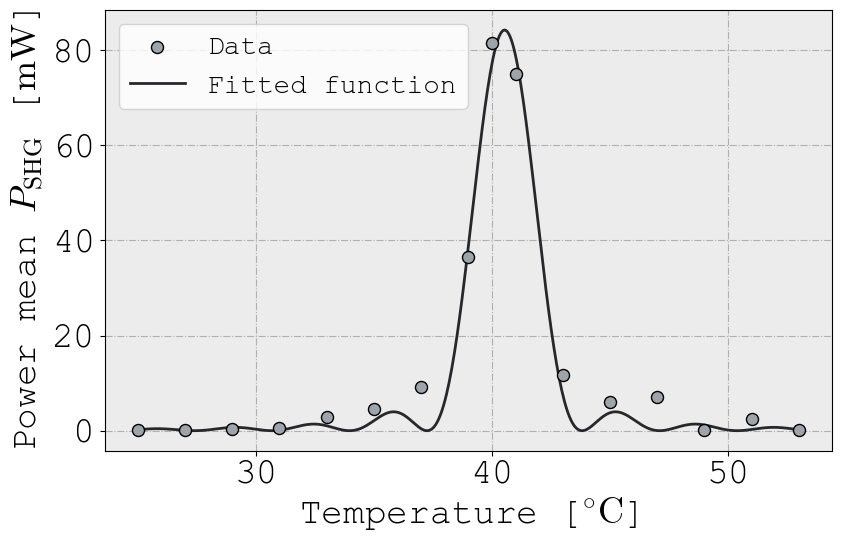

In [9]:
# Plot
temperature_fit = np.linspace(min(temperature), max(temperature), 500) 
power_fit = sinc_square(temperature_fit, a_fit, b_fit, t_fit)

plt.figure(figsize = (9, 6))
plt.scatter(temperature, power, label = r'Data', facecolor = '#9EA4AA',
            edgecolor = '#000000', linewidth = 1, zorder = 5, s = 75)
plt.plot(temperature_fit, power_fit, label = r'Fitted function', color = '#26282B')
plt.xlabel(r'Temperature [${}^{\circ}\mathrm{C}$]')
plt.ylabel(r'Power mean $P_{\mathrm{SHG}}$ [$\mathrm{mW}$]')
plt.legend(loc = "upper left", prop = {'size': 20})
plt.tight_layout()
plt.savefig("fit.pdf")
plt.show()